In [ ]:
notebook_dir = %pwd                                                     
import pysces                                                           
import psctb                                                            
import numpy                                                            
from os import path                                                     
from IPython.display import display, Image                              
from sys import platform                                                
%matplotlib inline                               

# Symca

Symca is used to perform symbolic metabolic control analysis [[3,4]](references.html) on metabolic pathway models in order to dissect the control properties of these pathways in terms of the different chains of local effects (or control patterns) that make up the total control coefficient values. Symbolic/algebraic expressions are generated for each control coefficient in a pathway which can be subjected to further analysis.

## Features

* Generates symbolic expressions for each control coefficient of a metabolic pathway model. 
* Splits control coefficients into control patterns that indicate the contribution of different chains of local effects.
* Control coefficient and control pattern expressions can be manipulated using standard `SymPy` functionality. 
* Values of control coefficient and control pattern values are determined automatically and updated automatically following the calculation of standard (non-symbolic) control coefficient values subsequent to a parameter alteration.
* Analysis sessions (raw expression data) can be saved to disk for later use. 
* The effect of parameter scans on control coefficient and control patters can be generated and displayed using `ScanFig`.
* Visualisation of control patterns by using `ModelGraph` functionality.
* Saving/loading of `Symca` sessions.
* Saving of control pattern results.

## Usage and feature walkthrough

### Workflow

Performing symbolic control analysis with `Symca` usually requires the following steps:

1. Instantiation of a `Symca` object using a `PySCeS` model object.
2. Generation of symbolic control coefficient expressions.
3. Access generated control coefficient expression results via `cc_results` and the corresponding control coefficient name (see [Basic Usage](basic_usage.ipynb#syntax))
4. Inspection of control coefficient values.
5. Inspection of control pattern values and their contributions towards the total control coefficient values. 
6. Inspection of the effect of parameter changes (parameter scans) on the values of control coefficients and control patterns and the contribution of control patterns towards control coefficients.
7. Session/result saving if required
8. Further analysis.

### Object instantiation

Instantiation of a `Symca` analysis object requires `PySCeS` model object (`PysMod`) as an argument. Using the included [lin4_fb.psc](included_files.html#lin4-fb-psc) model a `Symca` session is instantiated as follows:


In [3]:
mod = pysces.model('lin4_fb')
sc = psctb.Symca(mod)

Assuming extension is .psc
Using model directory: /home/jr/Pysces/psc
/home/jr/Pysces/psc/lin4_fb.psc loading ..... 
Parsing file: /home/jr/Pysces/psc/lin4_fb.psc
Info: "X4" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 
(hybrd) The solution converged.


Additionally `Symca` has the following arguments:

* `internal_fixed`: This must be set to `True` in the case where an internal metabolite has a fixed concentration *(default: `False`)*
* `auto_load`: If `True` `Symca` will try to load a previously saved session. Saved data is unaffected by the `internal_fixed` argument above *(default: `False`)*.

.. note:: For the case where an internal metabolite is fixed see [Fixed internal metabolites](Symca.ipynb#fixed-internal-metabolites) below.

### Generating symbolic control coefficient expressions

Control coefficient expressions can be generated as soon as a `Symca` object has been instantiated using the `do_symca` method. This process can potentially take quite some time to complete, therefore we recommend saving the generated expressions for later loading (see [Saving/Loading Sessions](Symca.ipynb#saving-loading-sessions) below). In the case of `lin4_fb.psc` expressions should be generated within a few seconds.

In [4]:
sc.do_symca()

Simplifying matrix with 28 elements
****************************


`do_symca` has the following arguments:

* `internal_fixed`: This must be set to `True` in the case where an internal metabolite has a fixed concentration *(default: `False`)*
* `auto_save_load`: If set to `True` `Symca` will attempt to load a previously saved session and only generate new expressions in case of a failure. After generation of new results, these results will be saved instead. Setting `internal_fixed` to `True` does not affect previously saved results that were generated with this argument set to `False` *(default: `False`)*.

### Accessing control coefficient expressions

Generated results may be accessed via a dictionary-like `cc_results` object (see [Basic Usage - Tables](basic_usage.ipynb#tables)). Inspecting this `cc_results` object in a IPython/Jupyter notebook yields a table of control coefficient values:

In [5]:
sc.cc_results

$C^{JR1}_{R1}$,0.036
$C^{JR1}_{R2}$,3.090e-06
$C^{JR1}_{R3}$,1.657e-06
$C^{JR1}_{R4}$,0.964
$C^{JR2}_{R1}$,0.036
$C^{JR2}_{R2}$,3.090e-06
$C^{JR2}_{R3}$,1.657e-06
$C^{JR2}_{R4}$,0.964
$C^{JR3}_{R1}$,0.036
$C^{JR3}_{R2}$,3.090e-06
$C^{JR3}_{R3}$,1.657e-06


Inspecting an individual control coefficient yields a symbolic expression together with a value:

In [6]:
sc.cc_results.ccJR1_R4

(-ecR1_S1*ecR2_S2*ecR3_S3 - ecR1_S3*ecR2_S1*ecR3_S2)/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

In the above example, the expression of the control coefficient consists of two numerator terms and a common denominator shared by all the control coefficient expression signified by $\Sigma$.

Various properties of this control coefficient can be accessed such as the:
* Expression (as a `SymPy` expression)

In [7]:
sc.cc_results.ccJR1_R4.expression

(-ecR1_S1*ecR2_S2*ecR3_S3 - ecR1_S3*ecR2_S1*ecR3_S2)/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

* Numerator expression (as a `SymPy` expression)

In [8]:
sc.cc_results.ccJR1_R4.numerator

-ecR1_S1*ecR2_S2*ecR3_S3 - ecR1_S3*ecR2_S1*ecR3_S2

* Denominator expression (as a `SymPy` expression)

In [9]:
sc.cc_results.ccJR1_R4.denominator

-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3

* Value (as a `float64`)

In [10]:
sc.cc_results.ccJR1_R4.value

0.9640799846074221

Additional, less pertinent, attributes are `abs_value`, `latex_expression`, `latex_expression_full`, `latex_numerator`, `latex_name`, `name` and `denominator_object`.

The individual control coefficient numerator terms, otherwise known as control patterns, may also be accessed as follows:

In [11]:
sc.cc_results.ccJR1_R4.CP001

-ecR1_S1*ecR2_S2*ecR3_S3/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

In [12]:
sc.cc_results.ccJR1_R4.CP002

-ecR1_S3*ecR2_S1*ecR3_S2/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

Each control pattern is numbered arbitrarily starting from 001 and has similar properties as the control coefficient object (i.e., their expression, numerator, value etc. can also be accessed).

#### Control pattern percentage contribution

Additionally control patterns have a `percentage` field which indicates the degree to which a particular control pattern contributes towards the overall control coefficient value:

In [13]:
sc.cc_results.ccJR1_R4.CP001.percentage

0.03087580996475991

In [14]:
sc.cc_results.ccJR1_R4.CP002.percentage

99.96912419003525

Unlike conventional percentages, however, these values are calculated as percentage contribution towards the sum of the absolute values of all the control coefficients (rather than as the percentage of the total control coefficient value). This is done to account for situations where control pattern values have different signs.

A particularly problematic example of where the above method is necessary, is a hypothetical control coefficient with a value of zero, but with two control patterns with equal value but opposite signs. In this case a conventional percentage calculation would lead to an undefined (`nan`) result, whereas our methodology would indicate that each control pattern is equally ($50\%$) responsible for the observed control coefficient value.

### Dynamic value updating

The values of the control coefficients and their control patterns are automatically updated when new steady-state
elasticity coefficients are calculated for the model. Thus changing a parameter of `lin4_hill`, such as the $V_{f}$ value of reaction 4, will lead to new control coefficient and control pattern values:

In [15]:
mod.reLoad()
# mod.Vf_4 has a default value of 50
mod.Vf_4 = 0.1
# calculating new steady state
mod.doMca()


Parsing file: /home/jr/Pysces/psc/lin4_fb.psc
Info: "X4" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 
(hybrd) The solution converged.


In [16]:
# now ccJR1_R4 and its two control patterns should have new values
sc.cc_results.ccJR1_R4

(-ecR1_S1*ecR2_S2*ecR3_S3 - ecR1_S3*ecR2_S1*ecR3_S2)/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

In [17]:
# original value was 0.000
sc.cc_results.ccJR1_R4.CP001

-ecR1_S1*ecR2_S2*ecR3_S3/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

In [18]:
# original value was 0.964
sc.cc_results.ccJR1_R4.CP002

-ecR1_S3*ecR2_S1*ecR3_S2/(-ecR1_S1*ecR2_S2*ecR3_S3 + ecR1_S1*ecR2_S2*ecR4_S3 - ecR1_S1*ecR3_S2*ecR4_S3 - ecR1_S3*ecR2_S1*ecR3_S2 + ecR2_S1*ecR3_S2*ecR4_S3)

In [19]:
# resetting to default Vf_4 value and recalculating
mod.reLoad()
mod.doMca()


Parsing file: /home/jr/Pysces/psc/lin4_fb.psc
Info: "X4" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 
(hybrd) The solution converged.


### Control pattern graphs

As described under [Basic Usage](basic_usage.ipynb#graphic-representation-of-metabolic-networks), `Symca` has the functionality to display the chains of local effects represented by control patterns on a scheme of a metabolic model. This functionality can be accessed via the `highlight_patterns` method:

In [20]:
# This path leads to the provided layout file 
path_to_layout = '~/Pysces/psc/lin4_fb.dict'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32' and pysces.version.current_version_tuple() < (0,9,8):
    path_to_layout = psctb.utils.misc.unix_to_windows_path(path_to_layout)
else:
    path_to_layout = path.expanduser(path_to_layout)

In [21]:
sc.cc_results.ccJR1_R4.highlight_patterns(height = 350, pos_dic=path_to_layout)

`highlight_patterns` has the following optional arguments:

* `width`: Sets the width of the graph (*default*: 900).
* `height`:Sets the height of the graph (*default*: 500).
* `show_dummy_sinks`: If `True` reactants with the "dummy" or "sink" will not be displayed (*default*: `False`).
* `show_external_modifier_links`: If `True` edges representing the interaction of external effectors with reactions will be shown (*default*: `False`).

Clicking either of the two buttons representing the control patterns highlights these patterns according according to their percentage contribution (as discussed [above](Symca.ipynb#control-pattern-percentage-contribution)) towards the total control coefficient.

In [23]:
# clicking on CP002 shows that this control pattern representing 
# the chain of effects passing through the feedback loop
# is totally responsible for the observed control coefficient value.
sc.cc_results.ccJR1_R4.highlight_patterns(height = 350, pos_dic=path_to_layout)

In [26]:
# clicking on CP001 shows that this control pattern representing 
# the chain of effects of the main pathway does not contribute
# at all to the control coefficient value.
sc.cc_results.ccJR1_R4.highlight_patterns(height = 350, pos_dic=path_to_layout)

### Parameter scans

Parameter scans can be performed in order to determine the effect of a parameter change on either the control coefficient and control pattern values or of the effect of a parameter change on the contribution of the control patterns towards the control coefficient (as discussed [above](Symca.ipynb#control-pattern-percentage-contribution)). The procedures for both the "value" and "percentage" scans are very much the same and rely on the same principles as described in the [Basic Usage](basic_usage.ipynb#plotting-and-displaying-results) and [RateChar](RateChar.ipynb#plotting-results) sections.

To perform a parameter scan the `do_par_scan` method is called. This method has the following arguments:

* `parameter`: A String representing the parameter which should be varied.
* `scan_range`: Any iterable representing the range of values over which to vary the parameter (typically a NumPy `ndarray` generated by `numpy.linspace` or `numpy.logspace`).
* `scan_type`: Either `"percentage"` or `"value"` as described above (*default*: `"percentage"`).
* `init_return`: If `True` the parameter value will be reset to its initial value after performing the parameter scan (*default*: `True`).
* `par_scan`: If `True`, the parameter scan will be performed by multiple parallel processes rather than a single process, thus speeding performance (*default*: `False`).
* `par_engine`: Specifies the engine to be used for the parallel scanning processes. Can either be `"multiproc"` or `"ipcluster"`. A discussion of the differences between these methods are beyond the scope of this document, see [here](http://www.davekuhlman.org/python_multiprocessing_01.html) for a brief overview of Multiprocessing in Python. (*default*: `"multiproc"`).
* `force_legacy`: If `True` `do_par_scan` will use a older and slower algorithm for performing the parameter scan. This is mostly used for debugging purposes. (*default*: `False`)


Below we will perform a percentage scan of $V_{f4}$ for 200 points between 0.01 and 1000 in log space:

In [28]:
percentage_scan_data = sc.cc_results.ccJR1_R4.do_par_scan(parameter='Vf_4',
                                                          scan_range=numpy.logspace(-1,3,200),
                                                          scan_type='percentage')

MaxMode 1
0 min 0 sec
SCANNER: Tsteps 200

SCANNER: 200 states analysed

(hybrd) The solution converged.


As previously described, these data can be displayed using `ScanFig` by calling the `plot` method of `percentage_scan_data`. Furthermore, lines can be enabled/disabled using the `toggle_category` method of `ScanFig` or by clicking on the appropriate buttons:

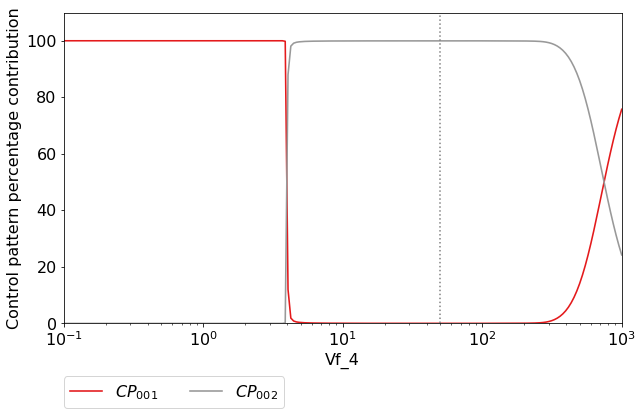

In [29]:
percentage_scan_plot = percentage_scan_data.plot()

# set the x-axis to a log scale
percentage_scan_plot.ax.semilogx()

# enable all the lines
percentage_scan_plot.toggle_category('Control Patterns', True)
percentage_scan_plot.toggle_category('CP001', True)
percentage_scan_plot.toggle_category('CP002', True)

# display the plot
percentage_scan_plot.interact()


A `value` plot can similarly be generated and displayed. In this case, however, an additional line indicating $C^{J}_{4}$ will also be present:

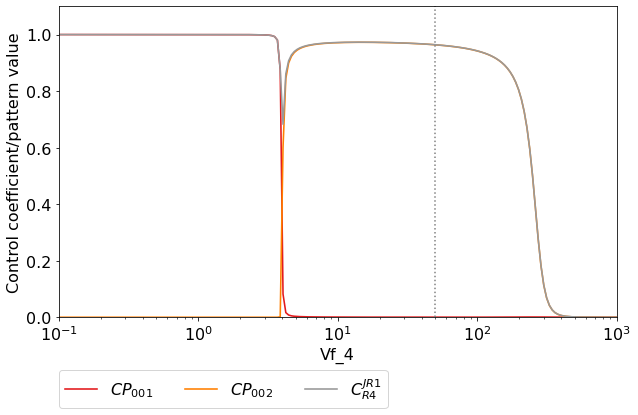

In [31]:
value_scan_data = sc.cc_results.ccJR1_R4.do_par_scan(parameter='Vf_4',
                                                     scan_range=numpy.logspace(-1,3,200),
                                                     scan_type='value')

value_scan_plot = value_scan_data.plot()

# set the x-axis to a log scale
value_scan_plot.ax.semilogx()

# enable all the lines
value_scan_plot.toggle_category('Control Coefficients', True)
value_scan_plot.toggle_category('ccJR1_R4', True)

value_scan_plot.toggle_category('Control Patterns', True)
value_scan_plot.toggle_category('CP001', True)
value_scan_plot.toggle_category('CP002', True)

# display the plot
value_scan_plot.interact()


### Fixed internal metabolites

In the case where the concentration of an internal intermediate is fixed (such as in the case of a GSDA) the `internal_fixed` argument must be set to `True` in either the `do_symca` method, or when instantiating the `Symca` object. This will typically result in the creation of a `cc_results_N` object for each separate reaction block, where `N` is a number starting at 0. Results can then be accessed via these objects as with normal free internal intermediate models.

Thus for a variant of the `lin4_fb` model where the intermediate`S3` is fixed at its steady-state value the procedure is as follows:

In [33]:
# Create a variant of mod with 'C' fixed at its steady-state value
mod_fixed_S3 = psctb.modeltools.fix_metabolite_ss(mod, 'S3')

# Instantiate Symca object the 'internal_fixed' argument set to 'True'
sc_fixed_S3 = psctb.Symca(mod_fixed_S3,internal_fixed=True)

# Run the 'do_symca' method (internal_fixed can also be set to 'True' here)
sc_fixed_S3.do_symca() 

(hybrd) The solution converged.

I hope we have a filebuffer
Seems like it

Reaction stoichiometry and rate equations

Species initial values

Parameters
Assuming extension is .psc
Using model directory: /home/jr/Pysces/psc
Using file: lin4_fb_S3.psc
/home/jr/Pysces/psc/orca/lin4_fb_S3.psc loading ..... 
Parsing file: /home/jr/Pysces/psc/orca/lin4_fb_S3.psc
Info: "X4" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 
(hybrd) The solution converged.
Simplifying matrix with 24 elements
************************


The normal `sc_fixed_S3.cc_results` object is still generated, but will be invalid for the fixed model. Each additional `cc_results_N` contains control coefficient expressions that have the same common denominator and corresponds to a specific reaction block. These `cc_results_N` objects are numbered arbitrarily, but consistantly accross different sessions. Each results object accessed and utilised in the same way as the normal `cc_results` object. 

For the `mod_fixed_c` model two additional results objects (`cc_results_0` and `cc_results_1`) are generated:



* `cc_results_1` contains the control coefficients describing the sensitivity of flux and concentrations within the supply block of `S3` towards reactions within the supply block. 

In [34]:
sc_fixed_S3.cc_results_1

$C^{JR1}_{R1}$,1.000
$C^{JR1}_{R2}$,8.603e-05
$C^{JR1}_{R3}$,4.612e-05
$C^{JR2}_{R1}$,1.000
$C^{JR2}_{R2}$,8.603e-05
$C^{JR2}_{R3}$,4.612e-05
$C^{JR3}_{R1}$,1.000
$C^{JR3}_{R2}$,8.603e-05
$C^{JR3}_{R3}$,4.612e-05
$C^{S1}_{R1}$,0.141
$C^{S1}_{R2}$,-0.092


* `cc_results_0` contains the control coefficients describing the sensitivity of flux and concentrations of either reaction block towards reactions in the other reaction block (i.e., all control coefficients here should be zero). Due to the fact that the `S3` demand block consists of a single reaction, this object also contains the control coefficient of `R4` on `J_R4`, which is equal to one. This results object is useful confirming that the results were generated as expected. 

In [35]:
sc_fixed_S3.cc_results_0

$C^{JR1}_{R4}$,0.000
$C^{JR2}_{R4}$,0.000
$C^{JR3}_{R4}$,0.000
$C^{JR4}_{R1}$,0.000
$C^{JR4}_{R2}$,0.000
$C^{JR4}_{R3}$,0.000
$C^{JR4}_{R4}$,1.000
$C^{S1}_{R4}$,0.000
$C^{S2}_{R4}$,0.000
$\Sigma$,1.000


If the demand block of `S3` in this pathway consisted of multiple reactions, rather than a single reaction, there would have been an additional `cc_results_N` object containing the control coefficients of that reaction block.  

### Saving results

In addition to being able to save parameter scan results (as previously described), a summary of the control coefficient and control pattern results can be saved using the `save_results` method. This saves a `csv` file (by default) to disk to any specified location. If no location is specified, a file named `cc_summary_N` is saved to the `~/Pysces/$modelname/symca/` directory, where `N` is a number starting at 0:


In [36]:
sc.save_results()

`save_results` has the following optional arguments:

* `file_name`: Specifies a path to save the results to. If `None`, the path defaults as described above.
* `separator`: The separator between fields (*default*: `","`)

The contents of the saved data file is as follows:

In [37]:
# the following code requires `pandas` to run
import pandas as pd
# load csv file at default path
results_path = '~/Pysces/lin4_fb/symca/cc_summary_0.csv'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32' and pysces.version.current_version_tuple() < (0,9,8):
    results_path = psctb.utils.misc.unix_to_windows_path(results_path)
else:
    results_path = path.expanduser(results_path)

saved_results = pd.read_csv(results_path)
# show first 20 lines
saved_results.head(n=20) 

,# name,value,latex_name,latex_expression
0,# results from cc_results,0.000000,nan,nan
1,ccJR1_R1,0.035915,C^{JR1}_{R1},(\varepsilon^{R2}_{S1} \varepsilon^{R3}_{S2} \...
2,CP001,0.035915,CP001,\varepsilon^{R2}_{S1} \varepsilon^{R3}_{S2} \v...
3,ccJR1_R2,0.000003,C^{JR1}_{R2},(- \varepsilon^{R1}_{S1} \varepsilon^{R3}_{S2}...
4,CP001,0.000003,CP001,- \varepsilon^{R1}_{S1} \varepsilon^{R3}_{S2} ...
5,ccJR1_R3,0.000002,C^{JR1}_{R3},(\varepsilon^{R1}_{S1} \varepsilon^{R2}_{S2} \...
6,CP001,0.000002,CP001,\varepsilon^{R1}_{S1} \varepsilon^{R2}_{S2} \v...
7,ccJR1_R4,0.964080,C^{JR1}_{R4},(- \varepsilon^{R1}_{S1} \varepsilon^{R2}_{S2}...
8,CP001,0.000298,CP001,- \varepsilon^{R1}_{S1} \varepsilon^{R2}_{S2} ...
9,CP002,0.963782,CP002,- \varepsilon^{R1}_{S3} \varepsilon^{R2}_{S1} ...


### Saving/loading sessions

Saving and loading `Symca` sessions is very simple and works similar to `RateChar`. Saving a session takes place with the `save_session` method, whereas the `load_session` method loads the saved expressions. As with the `save_results` method and most other saving and loading functionality, if no `file_name` argument is provided, files will be saved to the default directory (see also [Basic Usage](basic_usage.ipynb#saving-and-default-directories)). As previously described, expressions can also automatically be loaded/saved by `do_symca` by using the `auto_save_load` argument which saves and loads using the default path. Models with internal fixed metabolites are handled automatically.

In [38]:
# saving session
sc.save_session()

# create new Symca object and load saved results
new_sc = psctb.Symca(mod)
new_sc.load_session()

# display saved results
new_sc.cc_results

(hybrd) The solution converged.


$C^{JR1}_{R1}$,0.036
$C^{JR1}_{R2}$,3.090e-06
$C^{JR1}_{R3}$,1.657e-06
$C^{JR1}_{R4}$,0.964
$C^{JR2}_{R1}$,0.036
$C^{JR2}_{R2}$,3.090e-06
$C^{JR2}_{R3}$,1.657e-06
$C^{JR2}_{R4}$,0.964
$C^{JR3}_{R1}$,0.036
$C^{JR3}_{R2}$,3.090e-06
$C^{JR3}_{R3}$,1.657e-06
